<a href="https://colab.research.google.com/github/BifoldTide/-Core-Proyecto-2-Parte-I-/blob/develop/(Core)_Proyecto_2_%E2%80%93_Parte_I_EDA_2_(Iris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Descripción de datos:
Importado desde la biblioteca sklearn tamaño: 150 filas
- Largo del sépalo
- Ancho del sépalo
- Largo del pétalo
- Ancho del pétalo
- Especie

### Carga de datos

In [3]:
# Importación de datos y bibliotecas
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# Conversión de datos a dataframe
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["species"] = iris.target

# Descarga del dataset
df.to_csv("Iris.csv")

# Comprobar que los datos están bien
df_heatmap = df.copy()
especies = iris.target_names
df["species"] = df["species"].apply(lambda x: especies[0] if x == 0 else especies[1] if x == 2 else especies[2])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Gráficos

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.166778           0.881898   
sepal width (cm)           -0.166778          1.000000          -0.309635   
petal length (cm)           0.881898         -0.309635           1.000000   
petal width (cm)            0.834289         -0.289032           0.937667   
species                     0.798078         -0.440290           0.935431   

                   petal width (cm)   species  
sepal length (cm)          0.834289  0.798078  
sepal width (cm)          -0.289032 -0.440290  
petal length (cm)          0.937667  0.935431  
petal width (cm)           1.000000  0.938179  
species                    0.938179  1.000000  


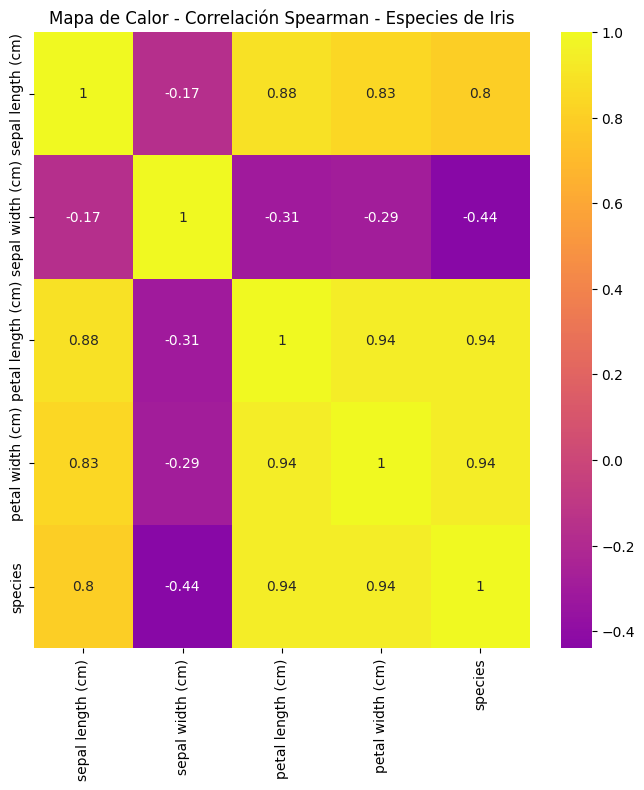

In [29]:
# Mapa de calor

# Generación correlativo con Spearman (es el que prefiero)
corr_spearman = df_heatmap.corr(method='spearman')
print(corr_spearman)
from os import name
# Generación mapa con correlativo
fig = plt.figure(figsize=(8, 8))
sns.heatmap(corr_spearman, annot=True, cmap='plasma', center=0)
plt.title("Mapa de Calor - Correlación Spearman - Especies de Iris")
plt.show()

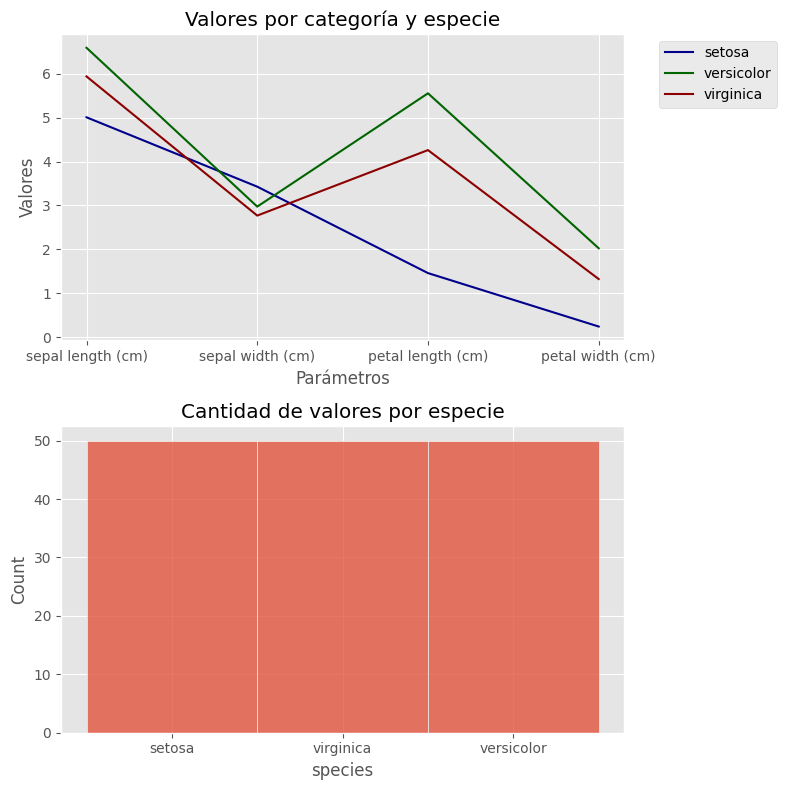

In [80]:
# Gráficos varios

# Gráfico de linea por promedios de sépalos y pétalos
promedios = df.groupby("species").mean().values
promedios
columnas = df.columns.tolist()
columnas = columnas[:4]
columnas
colores = ["darkblue", "darkgreen", "darkred"]
especies_list = especies.tolist()

fig = plt.figure(figsize = (8, 8))
plt.style.use('ggplot')
plt.subplot(2, 1, 1)
for especie in especies_list:
  plt.plot(columnas, promedios[especies_list.index(especie)], color = colores[especies_list.index(especie)], label = especie)

plt.xlabel("Parámetros")
plt.ylabel("Valores")
plt.title("Valores por categoría y especie")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Gráfico de histograma por especies
plt.subplot(2, 1, 2)
sns.histplot(data = df, x = "species")
plt.title("Cantidad de valores por especie")
plt.tight_layout()
plt.show()

### Resumen
- La muestra denota que eligieron la misma cantidad de muestras para las distintas especies
- Para poder definir la especie de Iris según sus métricas, lo más acertado sería catalogarlas según el largo y ancho de sus pétalos. Y si no queda del todo claro, comparar el largo del sépalo